# STEP 0: Use GPU

In [ ]:
# Make sure you use the Colab GPU to run the testing phase

import torch
torch.cuda.is_available()

True

In [1]:
# Show the GPU info

!nvidia-smi

Wed Nov 24 15:27:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# STEP 1: Git clone your project

In [2]:
# Git clone your project

!git clone https://github.com/ange33333333/2021.git

Cloning into '2021'...
remote: Enumerating objects: 21665, done.
remote: Total 21665 (delta 0), reused 0 (delta 0), pack-reused 21665
Receiving objects: 100% (21665/21665), 25.81 MiB | 22.94 MiB/s, done.
Resolving deltas: 100% (15186/15186), done.


# STEP 2: Install your requirements

In [3]:
# Install your requirments (torch, mmcv, ...)
# It is recommended that you wirte the requirements.txt file in your project.

%cd 2021

!pip install mmcv-full

!pip install -e .

!pip install googledrivedownloader

/content/2021
     |████████████████████████████████| 390 kB 5.4 MB/s 
     |████████████████████████████████| 185 kB 40.0 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.17-cp37-cp37m-linux_x86_64.whl size=44400166 sha256=7f8091448d62257eaec63e6b006faa27ed294ec13d256cc9c4cb7a858aa34675
  Stored in directory: /root/.cache/pip/wheels/5f/63/2c/49cc449e4a860b364c49c0b77d2275cb012f625d7c9203e444
Successfully built mmcv-full
Obtaining file:///content/2021
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15354 sha256=b07a5300018db0faaf241a59031a9c31d4c46ea8ae325c3d919a633553b79291
  Stored in directory: /root/.cache/pip/wheels/ba/ad/c8/2d98360791161cd3db6daf6b5e730f34021fc9367d5879f497
Successfully built terminaltables
  Running setup.py develop for mmdet


In [4]:
# Import your package and check the version

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

import mmdet
print(mmdet.__version__)

from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# You must import the below 5 packages 
import os
import cv2
import time
from tqdm import tqdm
from google_drive_downloader import GoogleDriveDownloader as gdd

1.10.0+cu111 True
2.18.0
11.1
GCC 7.5


# STEP 3: Wget testing data 

In [5]:
import zipfile
from google.colab import drive
drive.mount('/content/drive')

file_dir = "/content/drive/MyDrive/test.zip"
zipFile = zipfile.ZipFile(file_dir)
for file in zipFile.namelist():
      print(zipFile.extract(file,'/content'))
zipFile.close()

串流輸出內容已截斷至最後 5000 行。
/content/test/378933.png
/content/test/378963.png
/content/test/378970.png
/content/test/379056.png
/content/test/379079.png
/content/test/37908.png
/content/test/379097.png
/content/test/379103.png
/content/test/379131.png
/content/test/379156.png
/content/test/379174.png
/content/test/379188.png
/content/test/379190.png
/content/test/379223.png
/content/test/379239.png
/content/test/379262.png
/content/test/379295.png
/content/test/379307.png
/content/test/379314.png
/content/test/379414.png
/content/test/379470.png
/content/test/379484.png
/content/test/379512.png
/content/test/379543.png
/content/test/379553.png
/content/test/379556.png
/content/test/379595.png
/content/test/379695.png
/content/test/379736.png
/content/test/379753.png
/content/test/379835.png
/content/test/379862.png
/content/test/379871.png
/content/test/379872.png
/content/test/379896.png
/content/test/379938.png
/content/test/379968.png
/content/test/379995.png
/content/test/380074.png
/cont

In [6]:
# 1. Download the testing data

gdd.download_file_from_google_drive(file_id='1Fm-avdeNgzhPxhvia0iw9yZzcoOggy7I',
                                    dest_path='./test.zip',
                                    unzip=True)
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

# 2. Read the image_name and put them into the list
# You need to modify the path to fit your test_folder
data_listdir = os.listdir("/content/test")


Unzipping...Done.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# STEP 4: Run inferene and bench mark

In [10]:
# 1. Load your model and weights
config = '/content/drive/MyDrive/cascade_rcnn_r50_fpn_1x_voc.py'
checkpoint = "/content/drive/MyDrive/latest.pth"

# 2. Initialize the model
model = init_detector(config, checkpoint, device='cuda:0')


load checkpoint from local path: /content/drive/MyDrive/latest.pth


### Please **screenshot** this cell, including the code and the output (your inference time), and put it into your report.

In [11]:
# Test your inference time
TEST_IMAGE_NUMBER = 100 # This number is fixed.
test_img_list = []

# Read image (Be careful with the image order)
data_listdir.sort(key = lambda x: int(x[:-4]))
for img_name in data_listdir[:TEST_IMAGE_NUMBER]:
  img_path = os.path.join("/content/test", img_name)
  img = cv2.imread(img_path)
  test_img_list.append(img)

start_time = time.time()
for img in tqdm(test_img_list):
    # your model prediction
    pred = inference_detector(model, img)

end_time  = time.time()
print("\nInference time per image: ", (end_time - start_time) / len(test_img_list))

# Remember to screenshot!

  0%|          | 0/100 [00:00<?, ?it/s]/content/2021/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
100%|██████████| 100/100 [00:17<00:00,  5.60it/s]


Inference time per image:  0.17867690324783325


# STEP 5: Generate answer.json for submission on Codalab
The answer.json has the same format as [COCO dataset results](https://cocodataset.org/#format-results)

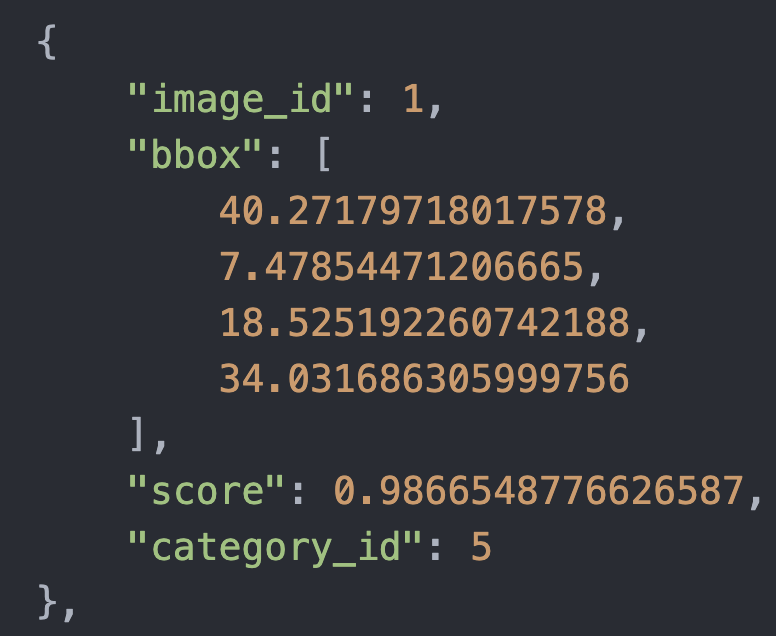

### Pseudo code for generating submission file


In [12]:
# Use the results from your model to generate the output json file
data_listdir = os.listdir("/content/test")
import json
data_listdir.sort(key = lambda x: int(x[:-4]))
result_to_json = []



# for each test image
for img_name in data_listdir:
    # the image_name is as same as the image_id
    image_id = int(img_name[:-4])
    img_path = os.path.join("/content/test", img_name)
    img = cv2.imread(img_path)
    pred = inference_detector(model, img)
    
    # add each detection box infomation into list
    for i, result in enumerate(pred):
        for number in result:
          det_box_info = {}
          if len(number)>0:
            # An integer to identify the image
            det_box_info["image_id"] = image_id
            bbox = number[0:4].tolist()
            bbox[2] = bbox[2]-bbox[0]
            bbox[3] = bbox[3]-bbox[1] 
            # A list ( [left_x, top_y, width, height] )
            det_box_info["bbox"] = bbox
        
            # A float number between 0 ~ 1 which means the confidence of the bbox
            det_box_info["score"] = float(number[4])

            # An integer which means the label class
            det_box_info["category_id"] = i
           
            result_to_json.append(det_box_info)
            print(det_box_info)

# Write the list to answer.json 
json_object = json.dumps(result_to_json, indent=4)

with open("answer.json", "w") as outfile:
    outfile.write(json_object)


串流輸出內容已截斷至最後 5000 行。
{'image_id': 454783, 'bbox': [37.30585479736328, 7.310463905334473, 9.872554779052734, 25.11649990081787], 'score': 0.9003565907478333, 'category_id': 1}
{'image_id': 454866, 'bbox': [95.46733856201172, 59.28754425048828, 49.28290557861328, 129.48725128173828], 'score': 0.0533921904861927, 'category_id': 1}
{'image_id': 454866, 'bbox': [40.392845153808594, 84.20932006835938, 65.32181549072266, 125.39955139160156], 'score': 0.8852113485336304, 'category_id': 2}
{'image_id': 454866, 'bbox': [65.15039825439453, 30.806793212890625, 47.77226257324219, 56.52232360839844], 'score': 0.2170916348695755, 'category_id': 2}
{'image_id': 454866, 'bbox': [96.818603515625, 60.00231170654297, 46.729095458984375, 129.63394927978516], 'score': 0.7568727135658264, 'category_id': 6}
{'image_id': 454871, 'bbox': [48.19218444824219, 8.45909309387207, 19.26300048828125, 31.98451805114746], 'score': 0.8640013337135315, 'category_id': 1}
{'image_id': 454871, 'bbox': [67.98905181884766, 8.9

# STEP 6: Share this notebook link on your GitHub/GitLab Readme.MD
Click the share on the right top buttom 